In [353]:

import pandas as pd
import numpy as np
df_houses = pd.read_csv("MSPUS.csv")
df_houses['observation_date'] = pd.to_datetime(df_houses['observation_date'])
df_houses['year'] = df_houses['observation_date'].dt.year
print(df_houses.shape)
df_houses.head()
{
    "tags": [
        "hide-input",
    ]
}


(248, 3)


{'tags': ['hide-input']}

In [319]:
#Creating the year groups
df_houses['year_group'] = pd.cut(
    df_houses['year'],
    bins=[1960, 1970, 1980, 1990, 2000, 2010, 2020,9999],
    labels=['1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010','2010-2020','2020>']
)
df_houses.drop(columns = ['year'],inplace = True)
df_closed = df_houses.copy()
# YOUR CODE ENDS
df_closed.head()

,observation_date,MSPUS,year_group
0,1963-01-01,17800,1960-1970
1,1963-04-01,18000,1960-1970
2,1963-07-01,17900,1960-1970
3,1963-10-01,18500,1960-1970
4,1964-01-01,18500,1960-1970


In [322]:
#Concentrated Data Set
df_houses.columns = ['observation_date','Mean Sales Price of House','year_group']
df_houses.drop(columns = ['observation_date'],inplace=True)
df_houses.head()

,Mean Sales Price of House,year_group
0,17800,1960-1970
1,18000,1960-1970
2,17900,1960-1970
3,18500,1960-1970
4,18500,1960-1970


In [329]:

df_closed = df_houses.groupby('year_group',as_index = False).agg({
    'Mean Sales Price of House': ['count','mean','median','sum','std']
})

df_closed.columns = ['year_group', 'count', 'mean', 'median', 'sum', 'std']
df_closed["growth_rate"] = df_closed["mean"].pct_change() * 100
df_closed

,year_group,count,mean,median,sum,std,growth_rate
0,1960-1970,32,21903.125,22200.0,700900,2635.793860,NaN
1,1970-1980,40,43715.000,42000.0,1748600,13599.275056,99.583393
2,1980-1990,40,92945.000,87400.0,3717800,19961.796204,112.615807
3,1990-2000,40,139660.000,137500.0,5586400,15831.367759,50.260907
4,2000-2010,40,216255.000,221700.0,8650200,24428.366760,54.843907
5,2010-2020,40,291667.500,301150.0,11666700,35370.873049,34.872026
6,2020>,16,415356.250,418850.0,6645700,24325.596087,42.407450


In [343]:
# Create a list to store the results
results = []

# Loop through each year group and calculate values
for i in df_closed['year_group']:
    try:
        # Get old and new values
        old = df_closed.loc[df_closed['year_group'] == i, 'mean'].iloc[0]
        new = df_closed.loc[df_closed['year_group'] == '2020>', 'mean'].iloc[0]

        # ROI Calculation
        roi = ((new / old) - 1) * 100

        # Extract midpoint year for growth calculation
        if ">" in str(i):
            years = 2020  # Handle "2020>"
        else:
            years = (int(str(i).split("-")[0]) + int(str(i).split("-")[1])) // 2

        # Growth rate per year
        n = 2020 - years
        a = ((new/old)**(1/n))-1
        # Net Present Value (NPV) estimate
        npv = old * ((a+1) ** n)

        # Append results to the list
        results.append([i, years, old,roi, n, a*100, npv])

    except IndexError:
        continue
    except Exception as e:
        continue

# Create a DataFrame to display results
df_results = pd.DataFrame(results, columns=["year_group", "Midpoint Year", "Initial Price", "ROI (%)", "Years", "Annualized Growth Rate (%)", "Estimated NPV"])

# Display the table

df_results



,year_group,Midpoint Year,Initial Price,ROI (%),Years,Annualized Growth Rate (%),Estimated NPV
0,1960-1970,1965,21903.125,1796.333286,55,5.495713,415356.25
1,1970-1980,1975,43715.000,850.145831,45,5.130486,415356.25
2,1980-1990,1985,92945.000,346.883910,35,4.370314,415356.25
3,1990-2000,1995,139660.000,197.405306,25,4.456134,415356.25
4,2000-2010,2005,216255.000,92.067813,15,4.447241,415356.25
5,2010-2020,2015,291667.500,42.407450,5,7.326395,415356.25


In [354]:
df_merged = pd.merge(
    left = df_closed,
    right = df_results, 
    on = 'year_group',
    how = 'inner'
)
df_merged


,year_group,count,mean,median,sum,std,growth_rate,mid_year,Midpoint Year,Initial Price,ROI (%),Years,Annualized Growth Rate (%),Estimated NPV
0,1960-1970,32,21903.125,22200.0,700900,2635.793860,NaN,1965,1965,21903.125,1796.333286,55,5.495713,415356.25
1,1970-1980,40,43715.000,42000.0,1748600,13599.275056,99.583393,1975,1975,43715.000,850.145831,45,5.130486,415356.25
2,1980-1990,40,92945.000,87400.0,3717800,19961.796204,112.615807,1985,1985,92945.000,346.883910,35,4.370314,415356.25
3,1990-2000,40,139660.000,137500.0,5586400,15831.367759,50.260907,1995,1995,139660.000,197.405306,25,4.456134,415356.25
4,2000-2010,40,216255.000,221700.0,8650200,24428.366760,54.843907,2005,2005,216255.000,92.067813,15,4.447241,415356.25
5,2010-2020,40,291667.500,301150.0,11666700,35370.873049,34.872026,2015,2015,291667.500,42.407450,5,7.326395,415356.25


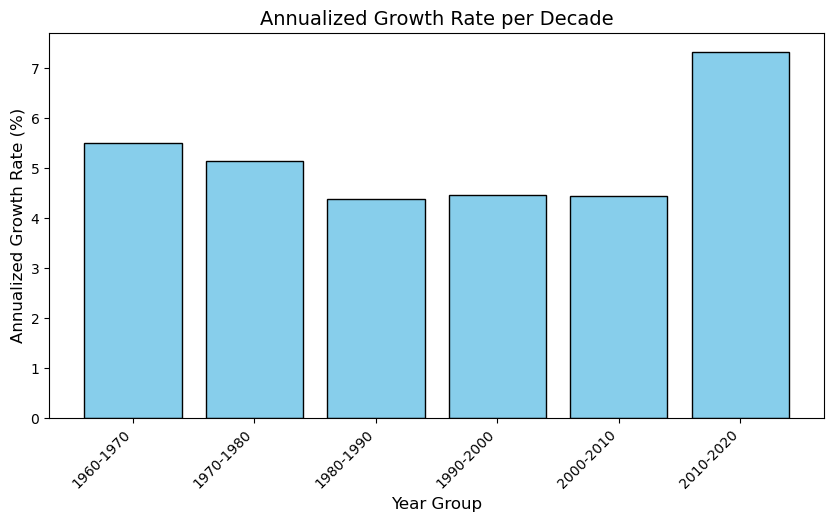

In [350]:
import matplotlib.pyplot as plt

# Ensure 'year_group' is a string
df_merged['year_group'] = df_merged['year_group'].astype(str)

# Extract start and end years, handle non-numeric values
def extract_mid_year(group):
    if ">" in group:
        return 2020  # Assume '2020>' represents 2020
    elif "-" in group:
        start, end = map(int, group.split("-"))
        return (start + end) // 2  # Midpoint
    else:
        return None  # Handle unexpected cases

df_merged["mid_year"] = df_merged["year_group"].apply(extract_mid_year)

# Drop rows where mid_year is None (if necessary)
df_merged = df_merged.dropna(subset=["mid_year"])

# Sort by extracted midpoint year
df_merged = df_merged.sort_values(by="mid_year")

# Plot
plt.figure(figsize=(10, 5))
plt.bar(df_merged['year_group'], df_merged["Annualized Growth Rate (%)"], color='skyblue', edgecolor='black')

# Labels & Title
plt.xlabel('Year Group', fontsize=12)
plt.ylabel('Annualized Growth Rate (%)', fontsize=12)
plt.title('Annualized Growth Rate per Decade', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()



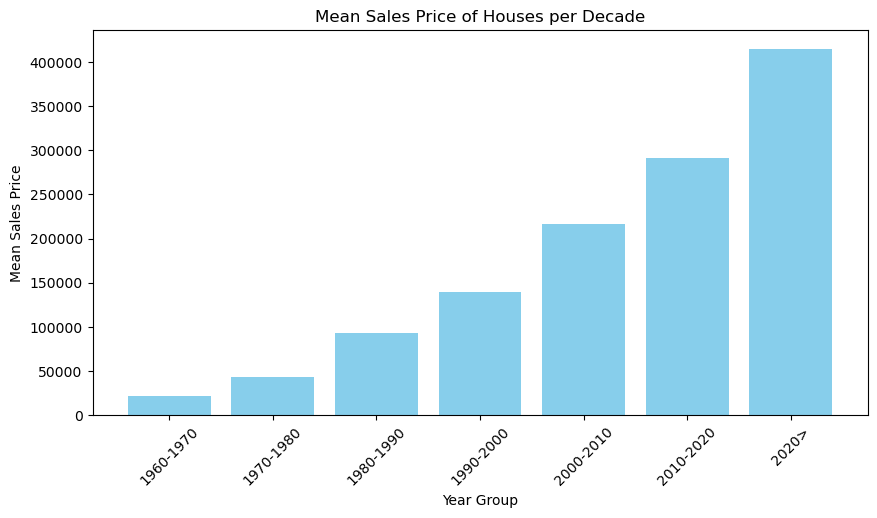

In [334]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_closed['year_group'], df_closed['mean'], color='skyblue')
plt.xlabel('Year Group')
plt.ylabel('Mean Sales Price')
plt.title('Mean Sales Price of Houses per Decade')
plt.xticks(rotation=45)
plt.show()


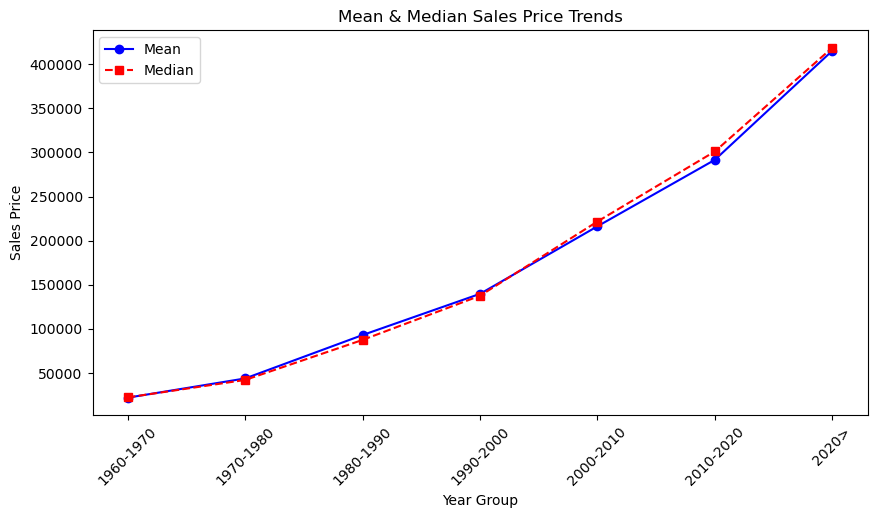

In [335]:
plt.figure(figsize=(10, 5))
plt.plot(df_closed['year_group'], df_closed['mean'], marker='o', linestyle='-', color='b', label='Mean')
plt.plot(df_closed['year_group'], df_closed['median'], marker='s', linestyle='--', color='r', label='Median')

plt.xlabel('Year Group')
plt.ylabel('Sales Price')
plt.title('Mean & Median Sales Price Trends')
plt.legend()
plt.xticks(rotation=45)
plt.show()


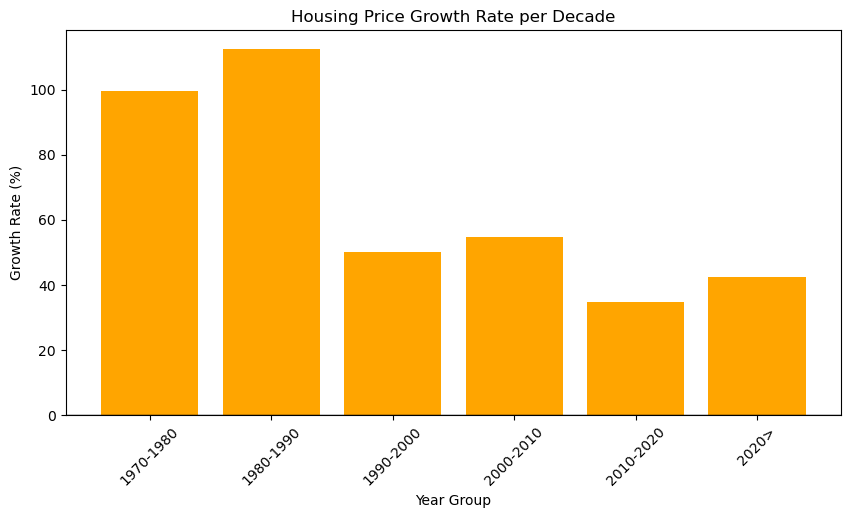

In [336]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_closed['year_group'], df_closed['growth_rate'], color='orange')

plt.xlabel('Year Group')
plt.ylabel('Growth Rate (%)')
plt.title('Housing Price Growth Rate per Decade')
plt.xticks(rotation=45)
plt.axhline(0, color="black", linewidth=1)  # Baseline for zero growth
plt.show()
